# **Dataset**

In [1]:
!pip install --upgrade kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.9)


In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vaishalikumari","key":"7bac817b3240fa00268393e5bb2aacbf"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  -----------------------------------------------  ------  -------------------  -------------  
unanimad/us-election-2020                               US Election 2020                                  428KB  2020-11-21 11:17:33           7230  
antgoldbloom/covid19-data-from-john-hopkins-university  COVID-19 data from John Hopkins University          3MB  2020-11-21 06:06:00           3328  
manchunhui/us-election-2020-tweets                      US Election 2020 Tweets                           353MB  2020-11-09 18:51:59           3119  
headsortails/us-election-2020-presidential-debates      US Election 2020 - Presidential Debates           199MB  2020-10-23 16:56:10            576  
etsc9287/2020-general-election-polls                    Election, COVID, and Demographic Data by Cou

In [7]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews  -p /content

 70% 18.0M/25.7M [00:00<00:00, 76.7MB/s]
100% 25.7M/25.7M [00:00<00:00, 85.7MB/s]


In [8]:
!unzip \*.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


# **Analyzing the dataset**

In [9]:
import pandas as pd
movie_reviews= pd.read_csv('IMDB Dataset.csv')
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Importing Required Libraries**

In [39]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow import keras
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense

from tensorflow.keras.layers import Flatten,Conv1D,LSTM
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
movie_reviews.isnull().values.any()

False

In [12]:
movie_reviews.shape

(50000, 2)

In [13]:
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
movie_reviews["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

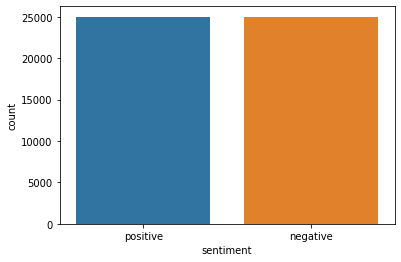

In [15]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews)

**Data Preprocessing**

In [16]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [17]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [18]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [19]:
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

In [20]:
X[10]

'Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines At first it was very odd and pretty funny but as the movie progressed didn find the jokes or oddness funny anymore Its low budget film thats never problem in itself there were some pretty interesting characters but eventually just lost interest imagine this film would appeal to stoner who is currently partaking For something similar but better try Brother from another planet '

In [21]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [22]:
y[10]

0

In [23]:
X[2]

'I thought this was wonderful way to spend time on too hot summer weekend sitting in the air conditioned theater and watching light hearted comedy The plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer While some may be disappointed when they realize this is not Match Point Risk Addiction thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love This was the most d laughed at one of Woody comedies in years dare say decade While ve never been impressed with Scarlet Johanson in this she managed to tone down her sexy image and jumped right into average but spirited young woman This may not be the crown jewel of his career but it was wittier than Devil Wears Prada and more interesting than Superman great comedy to go see with friends '

In [24]:
y[2]

1

**Preparing the Embedding Layer**

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [100]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [101]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [61]:
print(X_train.shape)
print(X_train[1])

(40000, 100)
[  47    0   14    1  100 4855    2 2600 1582    2    1  868    1  102
  662   50    6    5   21    0    0  409  417    1  572    8   27    5
 4568    0   50    6 1965  599    4 2516  436   34    1  301  132 1322
   65   21  255  143   31 1693  102   32  115   59    0   14    1   77
  100    6    1   12    2  645    0    5 1099    0  617   15  269    4
 2516  914    2    1  211  137 1181   37  728    2    0   30    1  621
  468  236   96 1067    9   12   91   22   72 1736   99    7  215  453
  107    7]


**Using GloVe embeddings to create our feature matrix**

In [86]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-11-21 19:06:51--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-11-21 19:06:51--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-11-21 19:06:52--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove

In [89]:
!unzip glove*.zip


Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [90]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [102]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# **Text Classification with Simple Neural Network**

In [103]:
model = Sequential()
embedding_layer = Embedding(vocab_size,100,weights=[embedding_matrix], input_length=maxlen,trainable=False )
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [104]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [105]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          9254700   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 10001     
Total params: 9,264,701
Trainable params: 10,001
Non-trainable params: 9,254,700
_________________________________________________________________
None


In [106]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 1s 4ms/step - loss: 0.5962 - acc: 0.6777 - val_loss: 0.5325 - val_acc: 0.7334
Epoch 2/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4935 - acc: 0.7621 - val_loss: 0.5373 - val_acc: 0.7303
Epoch 3/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4552 - acc: 0.7880 - val_loss: 0.5500 - val_acc: 0.7258
Epoch 4/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4377 - acc: 0.7981 - val_loss: 0.5190 - val_acc: 0.7475
Epoch 5/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4179 - acc: 0.8096 - val_loss: 0.5352 - val_acc: 0.7418
Epoch 6/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4061 - acc: 0.8165 - val_loss: 0.5331 - val_acc: 0.7429


In [107]:
score = model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.5338 - acc: 0.7425


In [108]:
print("Test loss:", score[0])
print("Test Accuracy:", score[1])

Test loss: 0.533818781375885
Test Accuracy: 0.7425000071525574


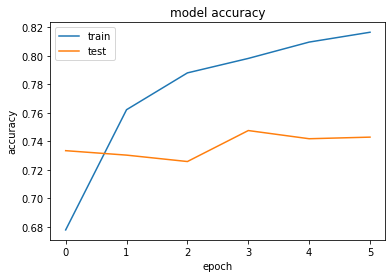

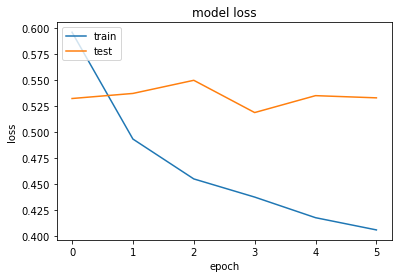

In [109]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# **Text Classification with a Convolutional Neural Network**

In [110]:
model1 = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model1.add(embedding_layer)

model1.add(Conv1D(128,5, activation='relu'))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [111]:
print(model1.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          9254700   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 9,318,957
Trainable params: 64,257
Non-trainable params: 9,254,700
_________________________________________________________________
None


In [112]:
history = model1.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model1.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
250/250 [==============================] - 1s 5ms/step - loss: 0.4920 - acc: 0.7557 - val_loss: 0.3935 - val_acc: 0.8235
Epoch 2/6
250/250 [==============================] - 1s 5ms/step - loss: 0.3644 - acc: 0.8380 - val_loss: 0.3655 - val_acc: 0.8354
Epoch 3/6
250/250 [==============================] - 1s 5ms/step - loss: 0.3162 - acc: 0.8671 - val_loss: 0.3646 - val_acc: 0.8346
Epoch 4/6
250/250 [==============================] - 1s 5ms/step - loss: 0.2775 - acc: 0.8865 - val_loss: 0.3450 - val_acc: 0.8445
Epoch 5/6
250/250 [==============================] - 1s 5ms/step - loss: 0.2419 - acc: 0.9093 - val_loss: 0.3536 - val_acc: 0.8430
Epoch 6/6
313/313 [==============================] - 1s 2ms/step - loss: 0.3428 - acc: 0.8493


In [113]:
print("Test loss:", score[0])
print("Test Accuracy:", score[1])

Test loss: 0.34276238083839417
Test Accuracy: 0.8493000268936157


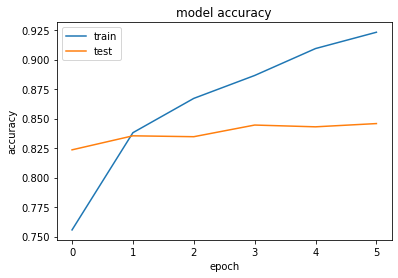

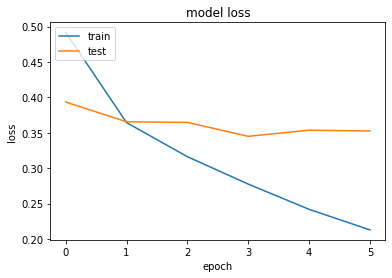

In [114]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

## **Text Classification with Recurrent Neural Network (LSTM)**

In [120]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [116]:
print(model2.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          500100    
_________________________________________________________________
lstm_3 (LSTM)                (None, 512)               1255424   
_________________________________________________________________
dense_5 (Dense)              (None, 500)               256500    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 501       
Total params: 2,012,525
Trainable params: 2,012,525
Non-trainable params: 0
_________________________________________________________________
None


In [121]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
250/250 [==============================] - 3s 12ms/step - loss: 0.5390 - accuracy: 0.7278 - val_loss: 0.4544 - val_accuracy: 0.7885
Epoch 2/6
250/250 [==============================] - 3s 10ms/step - loss: 0.4454 - accuracy: 0.7930 - val_loss: 0.4050 - val_accuracy: 0.8179
Epoch 3/6
250/250 [==============================] - 3s 10ms/step - loss: 0.3921 - accuracy: 0.8214 - val_loss: 0.3667 - val_accuracy: 0.8342
Epoch 4/6
250/250 [==============================] - 3s 10ms/step - loss: 0.3650 - accuracy: 0.8366 - val_loss: 0.3596 - val_accuracy: 0.8389
Epoch 5/6
250/250 [==============================] - 3s 10ms/step - loss: 0.3424 - accuracy: 0.8485 - val_loss: 0.3505 - val_accuracy: 0.8428
Epoch 6/6
313/313 [==============================] - 1s 4ms/step - loss: 0.3581 - accuracy: 0.8382


In [122]:
print("Test loss:", score[0])
print("Test Accuracy:", score[1])


Test loss: 0.3581286072731018
Test Accuracy: 0.8381999731063843


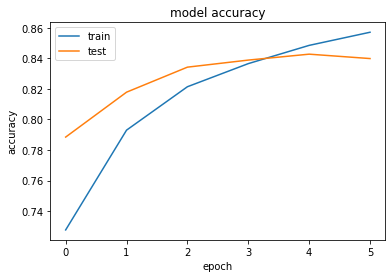

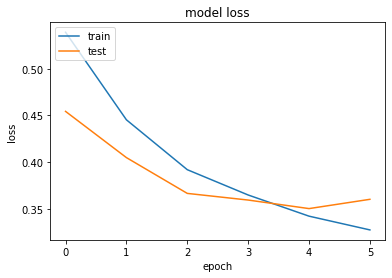

In [123]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# **Making prediction on single instance**

In [148]:
def result(n):
  if n[0]<0.5:
    print("Negative")
  else:
    print("Positive")

In [142]:
instance = X[57]
print(instance)

I laughed all the way through this rotten movie It so unbelievable woman leaves her husband after many years of marriage has breakdown in front of real estate office What happens The office manager comes outside and offers her job Hilarious Next thing you know the two women are going at it Yep they re lesbians Nothing rings true in this Lifetime for Women with nothing better to do movie Clunky dialogue like don want to spend the rest of my life feeling like had chance to be happy and didn take it doesn help There a wealthy distant mother who disapproves of her daughter new relationship sassy black maid unbelievable that in the year film gets made in which there a sassy black maid Hattie McDaniel must be turning in her grave The woman has husband who freaks out and wants custody of the snotty teenage kids Sheesh No cliche is left unturned 


In [143]:
y[57]

0

In [144]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)



**Using Simple Neural Network**


In [147]:
Simple=model.predict(instance)
print(Simple)

[[0.7702966]]


In [149]:
result(Simple) # This prediction is wrong 

Positive


**Using CNN**

In [151]:
CNN=model1.predict(instance)
print(CNN)

[[0.4922118]]


In [152]:
result(CNN) # this prediction is right

Negative


**RNN**

In [153]:
RNN=model2.predict(instance)
print(RNN)

[[0.14877442]]


In [154]:
result(RNN) # this pridiction is right and we can clearly see that LSTM is having more accuracy than CNN

Negative
